# Recepie Review and User Feedback Dataset

https://doi.org/10.24432/C5FG95
## Methodology Framework: CRISP-DM & AWS Well-Architected ML
### Framework Synergies
1. **Data Quality & Reliability**:
   - CRISP-DM: Data understanding and preparation
   - AWS: Reliability pillar for robust implementation

2. **Model Development**:
   - CRISP-DM: Modeling and evaluation phases
   - AWS: Performance efficiency and operational excellence

3. **Business Impact**:
   - CRISP-DM: Business understanding and deployment.
   - AWS: Cost optimization and security considerations.

---
### Sections:

 1. [Bussiness Understanding](#1bussiness-understanding).
 2. [Data Understanding](#2data-understanding). 
 3. [Data Preparation](#3data-preparation).
 4. [Modelling](#4-modeling). 
 5. [Evaluation](#5-evaluation). 
 6. Deployment.
---

### 1: Business Understanding

Recipe Review Sentiment Analysis

Business Objective:
- Analyze sentiment from recipe reviews and ratings
- Extract insights about user satisfaction and feedback patterns
- Build predictive model for sentiment classification

Dataset Description:
- Source: Recipe reviews and ratings dataset
- Size: >18,000 reviews
- Key features: User reviews, ratings (1-5 stars), engagement metrics

Success Metrics:
1. Model Performance:
   - Classification accuracy >80%
   - Balanced precision/recall across sentiment classes
2. Business Value:
   - Identify patterns in user satisfaction
   - Extract actionable insights for recipe improvement
   - Understand factors influencing positive/negative reviews


### 2.Data Understanding and Preprocessing.

#### 2.1 Dependecies.

In [85]:
# Standard Libraries
import os
import json
import pickle
from typing import (
    Dict, 
    List, 
    Tuple, 
    Any
)

# Data Manipulation
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from collections import Counter


# Natural Language Processing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK Downloads
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'punkt_tab'])

# Machine Learning
from sklearn.model_selection import (
    train_test_split,
    ParameterGrid
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from sklearn.preprocessing import LabelEncoder

# Deep Learning - Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Dense,
    Dropout
)
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Settings
sns.set_theme(style="whitegrid", palette="dark")

# Optional: Set random seeds for reproducibility
np.random.seed(98)
tf.random.set_seed(98)

[nltk_data] Downloading package punkt to /home/geo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/geo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/geo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/geo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 2.2 Define Paths.

In [69]:
DATA_PATH = "../data/raw/Recipe Reviews and User Feedback Dataset.csv"
PROCESSED_PATH = "../data/processed/Task_3_processed/"
FIGURE_PATH = "../reports/figures/Task_3/"
EVAL_PATH = "../reports/model_evaluations/Task_3/"
MODEL_DIR = "../models/Task_3/"


#### 2.3 Load the Dataset.

In [70]:
df = pd.read_csv(DATA_PATH)

#### 2.4 Display Basic Information.

In [71]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst few rows:")
display(df.head())
print("\nLast few rows")
display(df.tail())

Dataset Shape: (18182, 15)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB

Missing Values:
Unnamed: 

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...



Last few rows


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


#### 2.5 Basic Statistics Analysis.

In [72]:
print("Statistical Summary:")
print(df.describe().T)

# Display value counts for ratings
print("\nRating Distribution:")
print(df['stars'].value_counts().sort_index())

Statistical Summary:
                   count          mean           std           min  \
Unnamed: 0       18182.0  1.214653e+02  1.167479e+02  0.000000e+00   
recipe_number    18182.0  3.868936e+01  2.978665e+01  1.000000e+00   
recipe_code      18182.0  2.177367e+04  2.396511e+04  3.860000e+02   
user_reputation  18182.0  2.159608e+00  1.001467e+01  0.000000e+00   
created_at       18182.0  1.623710e+09  5.468697e+06  1.613035e+09   
reply_count      18182.0  1.462985e-02  1.379740e-01  0.000000e+00   
thumbs_up        18182.0  1.089264e+00  4.201004e+00  0.000000e+00   
thumbs_down      18182.0  5.493345e-01  3.470124e+00  0.000000e+00   
stars            18182.0  4.288802e+00  1.544786e+00  0.000000e+00   
best_score       18182.0  1.531621e+02  1.410753e+02  0.000000e+00   

                          25%           50%           75%           max  
Unnamed: 0       4.500000e+01  9.100000e+01  1.500000e+02  7.240000e+02  
recipe_number    1.200000e+01  3.300000e+01  6.400000e+01  1

##### 2.5.1 Star Rating Distribution

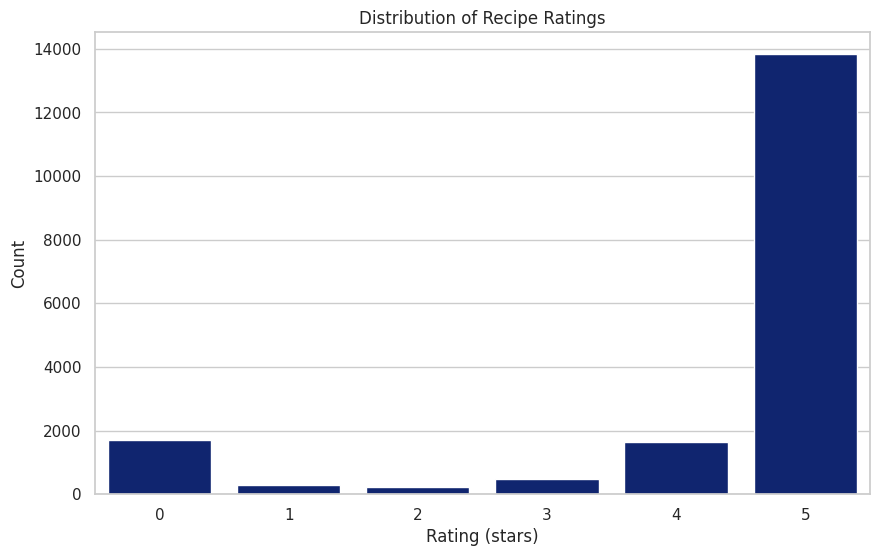

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stars')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/rating_distribution.png')
plt.show()

##### 2.5.2 Text Analysis

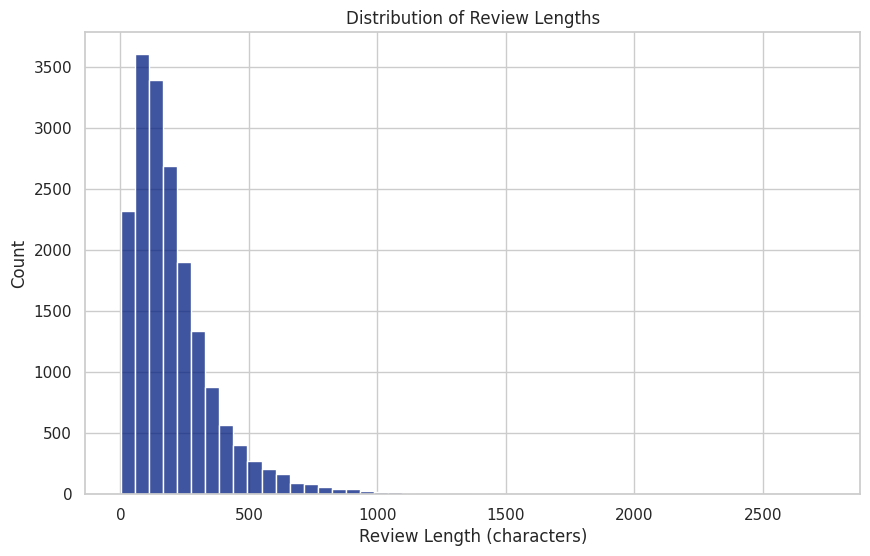

In [74]:
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/text_length_distribution.png')
plt.show()

In [75]:
# Print text length statistics
print("\nReview Length Statistics:")
print(df['text_length'].describe())


Review Length Statistics:
count    18180.000000
mean       203.909681
std        172.455624
min          1.000000
25%         90.000000
50%        161.000000
75%        266.000000
max       2742.000000
Name: text_length, dtype: float64


##### 2.5.3 User Engagement

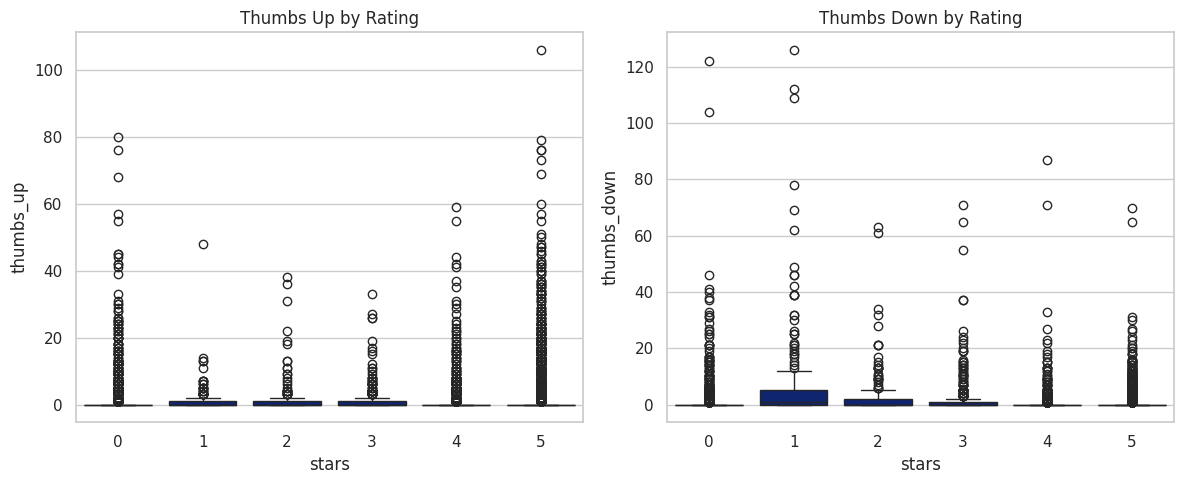

In [76]:
plt.figure(figsize=(12, 5))

# Thumbs up/down by rating
plt.subplot(121)
sns.boxplot(data=df, x='stars', y='thumbs_up')
plt.title('Thumbs Up by Rating')

plt.subplot(122)
sns.boxplot(data=df, x='stars', y='thumbs_down')
plt.title('Thumbs Down by Rating')

plt.tight_layout()
plt.savefig(f'{FIGURE_PATH}/engagement_by_rating.png')
plt.show()

##### 2.5.4 Correlation Analysis

In [77]:
def analyze_correlations(df: pd.DataFrame) -> None:
    """
    Analyze correlations between numerical features and target variable.
    """
    # Select numerical columns including engagement metrics
    numerical_cols = [
        'stars',
        'thumbs_up',
        'thumbs_down',
        'reply_count',
        'user_reputation',
        'best_score',
        'text_length'
    ]
    
    # Create correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='Blues',
        fmt='.2f',
        square=True,
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig(f"{FIGURE_PATH}/correlation_matrix.png")
    plt.show()
    
    # Print correlations with star rating
    print("\nCorrelations with Star Rating:")
    correlations = correlation_matrix['stars'].sort_values(ascending=False)
    for feature, corr in correlations.items():
        if feature != 'stars':
            print(f"{feature}: {corr:.3f}")

    # Additional analysis of engagement metrics
    print("\nEngagement Metrics Statistics by Rating:")
    engagement_metrics = ['thumbs_up', 'thumbs_down', 'reply_count']
    
    for metric in engagement_metrics:
        print(f"\n{metric.replace('_', ' ').title()} by Star Rating:")
        print(df.groupby('stars')[metric].describe()[['mean', 'std', 'max']])

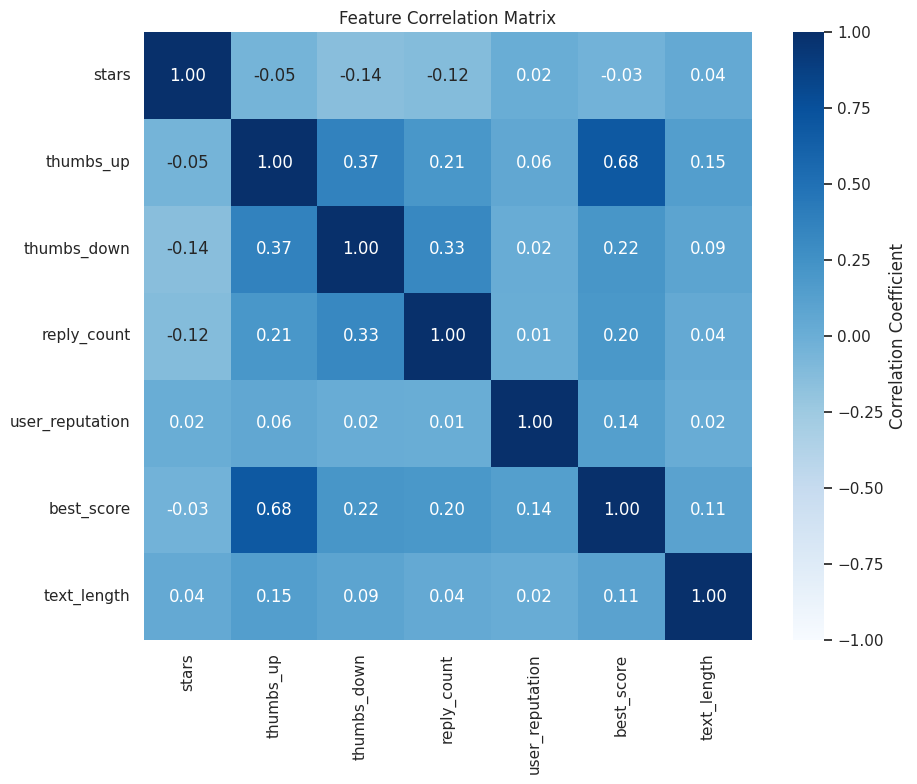


Correlations with Star Rating:
text_length: 0.043
user_reputation: 0.016
best_score: -0.034
thumbs_up: -0.051
reply_count: -0.120
thumbs_down: -0.143

Engagement Metrics Statistics by Rating:

Thumbs Up by Star Rating:
           mean       std    max
stars                           
0      1.771816  6.095731   80.0
1      0.992857  3.447500   48.0
2      1.521552  4.872350   38.0
3      1.138776  3.361201   33.0
4      1.073716  4.177660   59.0
5      1.000362  3.931591  106.0

Thumbs Down by Star Rating:
           mean        std    max
stars                            
0      1.102005   5.474282  122.0
1      6.082143  15.762929  126.0
2      2.758621   7.531315   63.0
3      1.981633   6.572365   71.0
4      0.590937   3.455020   87.0
5      0.276737   1.535095   70.0

Reply Count by Star Rating:
           mean       std  max
stars                         
0      0.051887  0.269856  3.0
1      0.067857  0.265796  2.0
2      0.068966  0.314832  3.0
3      0.057143  0.265231  2.0


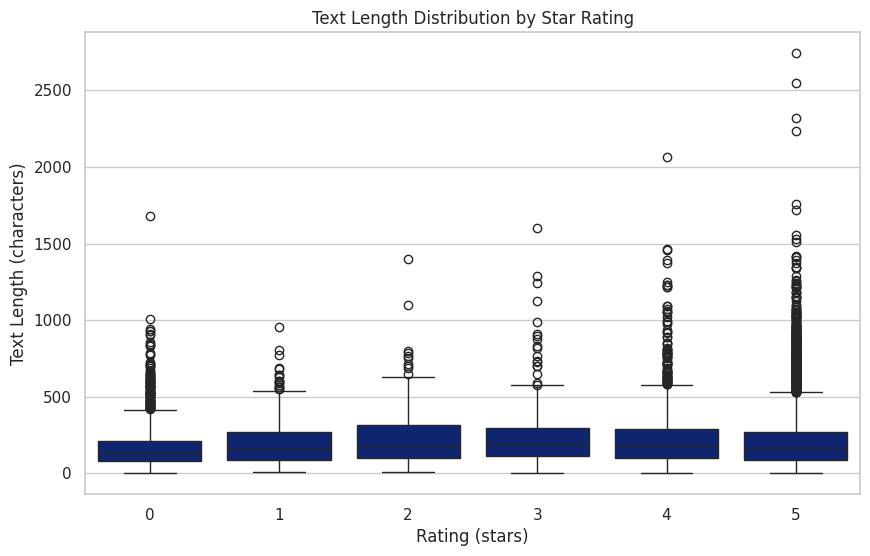

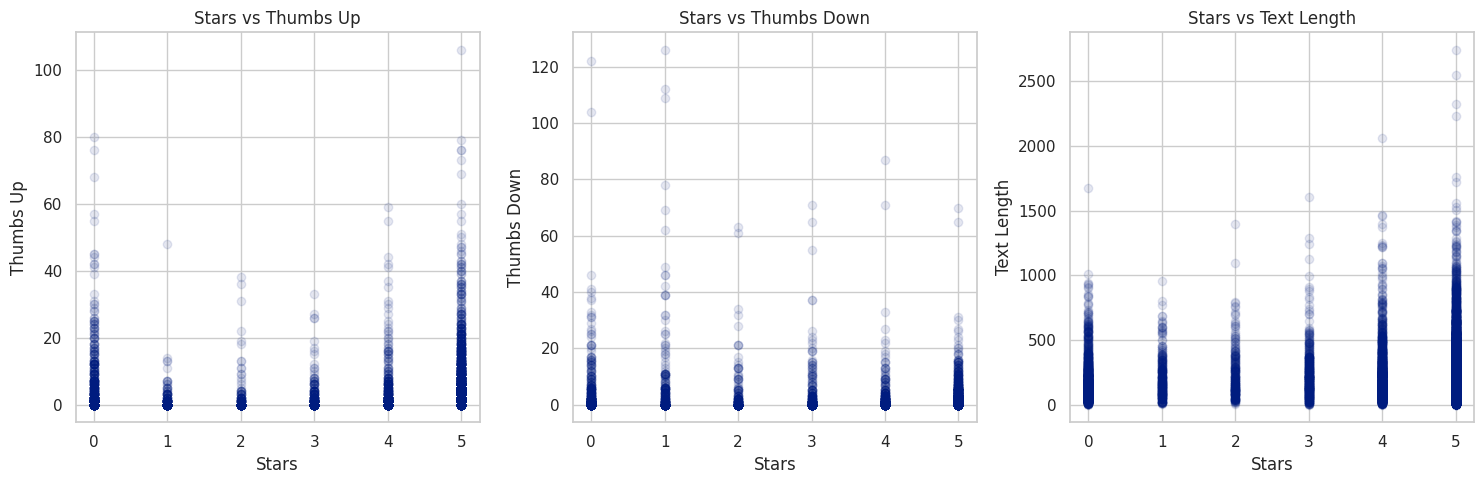

In [78]:

# Analyze correlations
analyze_correlations(df)

# Visualize relationship between stars and text length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stars', y='text_length')
plt.title('Text Length Distribution by Star Rating')
plt.xlabel('Rating (stars)')
plt.ylabel('Text Length (characters)')
plt.savefig(f"{FIGURE_PATH}/text_length_by_rating.png")
plt.show()

# Create scatter plots for key relationships
plt.figure(figsize=(15, 5))

# Stars vs Thumbs Up
plt.subplot(131)
plt.scatter(df['stars'], df['thumbs_up'], alpha=0.1)
plt.title('Stars vs Thumbs Up')
plt.xlabel('Stars')
plt.ylabel('Thumbs Up')

# Stars vs Thumbs Down
plt.subplot(132)
plt.scatter(df['stars'], df['thumbs_down'], alpha=0.1)
plt.title('Stars vs Thumbs Down')
plt.xlabel('Stars')
plt.ylabel('Thumbs Down')

# Stars vs Text Length
plt.subplot(133)
plt.scatter(df['stars'], df['text_length'], alpha=0.1)
plt.title('Stars vs Text Length')
plt.xlabel('Stars')
plt.ylabel('Text Length')

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/feature_relationships.png")
plt.show()


##### 2.5.5 Word Cloud.

Generating word clouds for reviews...


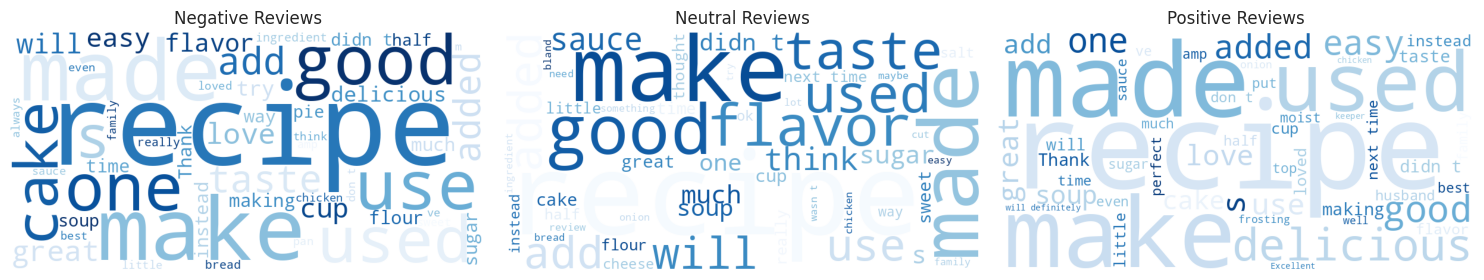

In [86]:
def create_simple_wordcloud(df: pd.DataFrame) -> None:
    """
    Create simple word clouds for positive and negative reviews.
    """
    # Create figure with subplots
    plt.figure(figsize=(15, 5))
    
    # Prepare data for each sentiment
    sentiment_data = {
        'Negative Reviews': df[df['stars'] <= 2]['text'],
        'Neutral Reviews': df[df['stars'] == 3]['text'],
        'Positive Reviews': df[df['stars'] >= 4]['text']
    }
    
    # Create word clouds
    for idx, (title, texts) in enumerate(sentiment_data.items(), 1):
        # Combine all texts
        text = ' '.join(texts.astype(str))
        
        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=50,
            colormap='Blues'
        ).generate(text)
        
        # Add subplot
        plt.subplot(1, 3, idx)
        plt.imshow(wordcloud)
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(f"{FIGURE_PATH}/review_wordclouds.png")
    plt.show()

# Generate word clouds
print("Generating word clouds for reviews...")
create_simple_wordcloud(df)

Analyzing word frequencies...


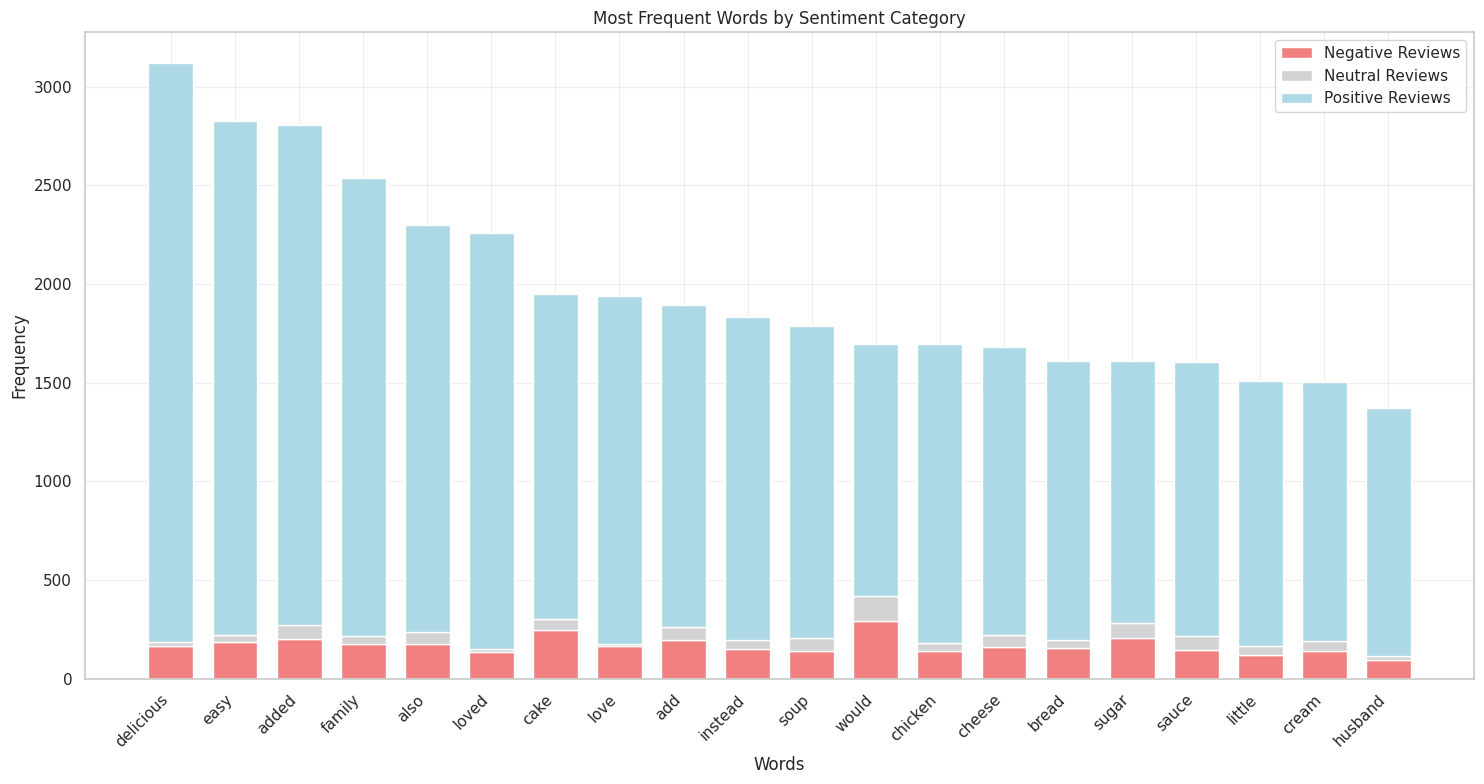


Top 20 Most Frequent Words and their Distribution:
            word  total  negative_pct  neutral_pct  positive_pct
9487   delicious   3119          5.42         0.55         94.04
7866        easy   2824          6.62         1.20         92.17
11202      added   2807          7.20         2.53         90.27
2787      family   2538          7.01         1.58         91.41
1757        also   2298          7.79         2.57         89.64
9137       loved   2257          5.98         0.80         93.22
3615        cake   1950         12.82         2.67         84.51
8018        love   1939          8.51         0.72         90.77
10237        add   1892         10.36         3.49         86.15
4766     instead   1834          8.40         2.24         89.37
11045       soup   1787          7.83         3.69         88.47
3306       would   1697         17.21         7.54         75.25
2334     chicken   1694          8.26         2.42         89.32
1354      cheese   1680          9.52 

In [88]:
def analyze_word_frequencies(df: pd.DataFrame, top_n: int = 20) -> None:
    """
    Analyze and visualize word frequencies for different sentiment categories.
    """
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Add custom stopwords for recipe reviews
    recipe_stopwords = {
    # Basic recipe terms
    'recipe', 'recipes', 'cook', 'cooking', 
    
    # Common actions
    'made', 'make', 'making',
    
    # Generic food terms
    'food', 'dish', 'meal', 'ingredients',
    
    # Kitchen/time related
    'kitchen', 'minutes', 'hour', 'hours', 'time',
    
    # Generic descriptors
    'like', 'just', 'one', 'will', 'used', 'use',
    
    # Common positive words (too generic)
    'good', 'great', 'better', 'best', 'really', 
    
    # Quantity words
    'much', 'way'
}
    stop_words.update(recipe_stopwords)
    
    def get_word_freq(texts):
        # Combine all texts and convert to lowercase
        text = ' '.join(texts.astype(str)).lower()
        
        # Tokenize
        words = word_tokenize(text)
        
        # Remove stopwords, special characters, and short words
        words = [word for word in words 
                if word.isalnum() 
                and word not in stop_words 
                and len(word) > 2]
        
        return Counter(words)
    
    # Get word frequencies for each sentiment
    neg_freq = get_word_freq(df[df['stars'] <= 2]['text'])
    neu_freq = get_word_freq(df[df['stars'] == 3]['text'])
    pos_freq = get_word_freq(df[df['stars'] >= 4]['text'])
    
    # Get top words overall
    all_words = pd.DataFrame([
        {'word': word, 
         'negative': neg_freq[word],
         'neutral': neu_freq[word],
         'positive': pos_freq[word]}
        for word in set().union(*[neg_freq, neu_freq, pos_freq])
    ])
    
    # Calculate totals and sort
    all_words['total'] = all_words['negative'] + all_words['neutral'] + all_words['positive']
    all_words = all_words.sort_values('total', ascending=False)
    
    # Plot top N words
    top_words = all_words.head(top_n)
    
    # Create stacked bar chart
    plt.figure(figsize=(15, 8))
    bar_width = 0.7
    
    plt.bar(top_words['word'], top_words['negative'], 
            label='Negative Reviews', color='lightcoral', width=bar_width)
    plt.bar(top_words['word'], top_words['neutral'], bottom=top_words['negative'],
            label='Neutral Reviews', color='lightgray', width=bar_width)
    plt.bar(top_words['word'], top_words['positive'], 
            bottom=top_words['negative'] + top_words['neutral'],
            label='Positive Reviews', color='lightblue', width=bar_width)
    
    plt.title('Most Frequent Words by Sentiment Category')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{FIGURE_PATH}/word_frequencies.png")
    plt.show()
    
    # Print frequency table
    print("\nTop 20 Most Frequent Words and their Distribution:")
    freq_table = top_words.copy()
    for col in ['negative', 'neutral', 'positive']:
        freq_table[f'{col}_pct'] = freq_table[col] / freq_table['total'] * 100
    
    print(freq_table[[
        'word', 'total',
        'negative_pct', 'neutral_pct', 'positive_pct'
    ]].round(2).to_string())
    
    return freq_table

# Analyze word frequencies
print("Analyzing word frequencies...")
freq_table = analyze_word_frequencies(df)

# Save frequency analysis
freq_table.to_csv(f"{PROCESSED_PATH}/word_frequencies.csv", index=False)
print(f"\nWord frequency analysis saved to: {PROCESSED_PATH}/word_frequencies.csv")

### 3. Data Preparation.

#### 3.1 Data Cleaning and Preparation.

In [89]:
def clean_and_prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and prepare data for modeling.
    Based on insights from word frequency analysis.
    """
    # Make a copy to avoid modifying original data
    df_cleaned = df.copy()
    
    # 1. Remove 0 ratings and empty reviews
    print("Removing invalid entries...")
    df_cleaned = df_cleaned[df_cleaned['stars'] > 0]
    df_cleaned = df_cleaned.dropna(subset=['text'])
    
    # 2. Convert ratings to sentiment categories
    print("Creating sentiment labels...")
    df_cleaned['sentiment'] = df_cleaned['stars'].apply(
        lambda x: 'negative' if x <= 2 
        else 'neutral' if x == 3 
        else 'positive'
    )
    
    # 3. Clean text content
    print("Cleaning text content...")
    df_cleaned['cleaned_text'] = df_cleaned['text'].apply(clean_text)
    
    # 4. Add VADER sentiment scores
    print("Adding VADER sentiment scores...")
    sid = SentimentIntensityAnalyzer()
    df_cleaned['vader_scores'] = df_cleaned['cleaned_text'].apply(
        lambda x: sid.polarity_scores(x))
    
    # Extract VADER features
    df_cleaned['vader_compound'] = df_cleaned['vader_scores'].apply(lambda x: x['compound'])
    df_cleaned['vader_pos'] = df_cleaned['vader_scores'].apply(lambda x: x['pos'])
    df_cleaned['vader_neg'] = df_cleaned['vader_scores'].apply(lambda x: x['neg'])
    df_cleaned = df_cleaned.drop('vader_scores', axis=1)
    
    # 5. Create text length features
    print("Creating text features...")
    df_cleaned['text_length'] = df_cleaned['cleaned_text'].str.len()
    df_cleaned['word_count'] = df_cleaned['cleaned_text'].str.split().str.len()
    
    # 6. Create binary indicators for key terms
    print("Creating keyword indicators...")
    key_positive_words = ['delicious', 'easy', 'loved', 'family', 'perfect']
    key_negative_words = ['would', 'instead', 'but', 'however']
    
    for word in key_positive_words:
        df_cleaned[f'has_{word}'] = df_cleaned['cleaned_text'].str.contains(
            r'\b' + word + r'\b', case=False).astype(int)
    
    for word in key_negative_words:
        df_cleaned[f'has_{word}'] = df_cleaned['cleaned_text'].str.contains(
            r'\b' + word + r'\b', case=False).astype(int)
    
    return df_cleaned

#### 3.2 Tex Cleaning.

In [91]:
def clean_text(text: str) -> str:
    """
    Clean text while preserving meaningful terms.
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters but keep meaningful punctuation
    text = re.sub(r'[^a-z\s.,!?]', ' ', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

#### 3.3 Execute Data Preparation.

In [92]:
# Execute data preparation
print("Starting data preparation...")
df_prepared = clean_and_prepare_data(df)

# Display results
print("\nShape of prepared dataset:", df_prepared.shape)
print("\nSentiment distribution:")
print(df_prepared['sentiment'].value_counts())

# Save prepared dataset
print("\nSaving prepared dataset...")
save_path = f"{PROCESSED_PATH}/prepared_data.csv"
df_prepared.to_csv(save_path, index=False)
print(f"Dataset saved to: {save_path}")

# Display sample of prepared data
print("\nSample of prepared data:")
sample_cols = ['sentiment', 'cleaned_text', 'vader_compound', 'text_length'] + \
             [col for col in df_prepared.columns if col.startswith('has_')]
print(df_prepared[sample_cols].head())

Starting data preparation...
Removing invalid entries...
Creating sentiment labels...
Cleaning text content...
Adding VADER sentiment scores...
Creating text features...
Creating keyword indicators...

Shape of prepared dataset: (16484, 31)

Sentiment distribution:
sentiment
positive    15482
negative      512
neutral       490
Name: count, dtype: int64

Saving prepared dataset...
Dataset saved to: ../data/processed/Task_3_processed//prepared_data.csv

Sample of prepared data:
  sentiment                                       cleaned_text  \
0  positive  i tweaked it a little, removed onions because ...   
1  positive  bush used to have a white chili bean and it ma...   
2  positive  i have a very complicated white chicken chili ...   
5  positive  amazing! my boyfriend loved it so much! going ...   
6  positive  wow!!! this recipe is excellent as written!! t...   

   vader_compound  text_length  has_delicious  has_easy  has_loved  \
0          0.8881          354              0      

In [93]:
def validate_preprocessing(df_original: pd.DataFrame, df_prepared: pd.DataFrame) -> None:
    """
    Validate preprocessing steps and display key metrics.
    """
    print("Preprocessing Validation Report")
    print("=" * 50)
    
    # 1. Data Size Changes
    print("\n1. Data Size Analysis:")
    print(f"Original rows: {len(df_original)}")
    print(f"Prepared rows: {len(df_prepared)}")
    print(f"Rows removed: {len(df_original) - len(df_prepared)}")
    
    # 2. Sentiment Distribution
    print("\n2. Sentiment Distribution:")
    sentiment_dist = df_prepared['sentiment'].value_counts()
    for sentiment, count in sentiment_dist.items():
        percentage = (count / len(df_prepared)) * 100
        print(f"{sentiment}: {count} ({percentage:.2f}%)")
    
    # 3. VADER Sentiment Analysis
    print("\n3. VADER Sentiment Correlation with Ratings:")
    vader_corr = df_prepared['vader_compound'].corr(df_prepared['stars'])
    print(f"Correlation between VADER compound score and star rating: {vader_corr:.3f}")
    
    # 4. Key Term Analysis
    print("\n4. Key Term Frequencies by Sentiment:")
    key_term_cols = [col for col in df_prepared.columns if col.startswith('has_')]
    
    # Calculate frequencies
    term_stats = []
    for col in key_term_cols:
        term = col.replace('has_', '')
        stats = df_prepared.groupby('sentiment')[col].mean()
        term_stats.append({
            'term': term,
            'negative': stats['negative'],
            'neutral': stats['neutral'],
            'positive': stats['positive']
        })
    
    term_df = pd.DataFrame(term_stats)
    print("\nKey term frequencies by sentiment:")
    print(term_df.round(3))
    
    # 5. Text Length Analysis
    print("\n5. Text Length Analysis by Sentiment:")
    length_stats = df_prepared.groupby('sentiment')['text_length'].agg(['mean', 'std', 'min', 'max'])
    print(length_stats.round(2))
    
    # Visualize preprocessing results
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Sentiment Distribution
    plt.subplot(131)
    sns.countplot(data=df_prepared, x='sentiment', palette='Blues')
    plt.title('Sentiment Distribution')
    plt.xticks(rotation=45)
    
    # Plot 2: VADER Compound Scores by Sentiment
    plt.subplot(132)
    sns.boxplot(data=df_prepared, x='sentiment', y='vader_compound', palette='Blues')
    plt.title('VADER Scores by Sentiment')
    plt.xticks(rotation=45)
    
    # Plot 3: Text Length Distribution by Sentiment
    plt.subplot(133)
    sns.boxplot(data=df_prepared, x='sentiment', y='text_length', palette='Blues')
    plt.title('Text Length by Sentiment')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f"{FIGURE_PATH}/preprocessing_validation.png")
    plt.show()

Validating preprocessing results...
Preprocessing Validation Report

1. Data Size Analysis:
Original rows: 18182
Prepared rows: 16484
Rows removed: 1698

2. Sentiment Distribution:
positive: 15482 (93.92%)
negative: 512 (3.11%)
neutral: 490 (2.97%)

3. VADER Sentiment Correlation with Ratings:
Correlation between VADER compound score and star rating: 0.364

4. Key Term Frequencies by Sentiment:

Key term frequencies by sentiment:
        term  negative  neutral  positive
0  delicious     0.025    0.035     0.184
1       easy     0.023    0.065     0.164
2      loved     0.010    0.033     0.130
3     family     0.045    0.080     0.142
4    perfect     0.012    0.010     0.058
5      would     0.201    0.212     0.073
6    instead     0.039    0.071     0.094
7        but     0.352    0.463     0.189
8    however     0.018    0.039     0.013

5. Text Length Analysis by Sentiment:
             mean     std  min   max
sentiment                           
negative   212.31  173.21    8  1

/tmp/ipykernel_85825/1442444007.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_prepared, x='sentiment', palette='Blues')
/tmp/ipykernel_85825/1442444007.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_prepared, x='sentiment', y='vader_compound', palette='Blues')
/tmp/ipykernel_85825/1442444007.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_prepared, x='sentiment', y='text_length', palette='Blues')


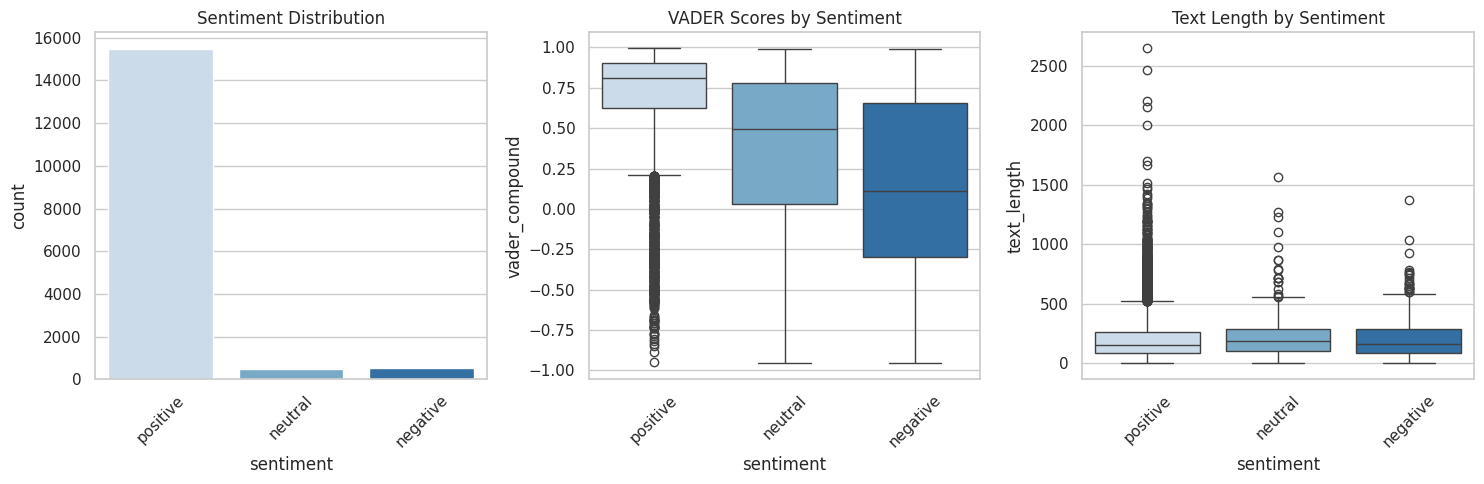

In [96]:
print("Validating preprocessing results...")
validate_preprocessing(df, df_prepared)